In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.csv' with the name of your CSV file
data = pd.read_csv('data/SHARADAR_holdings.csv')

In [21]:
data['calendardate'] = pd.to_datetime(data['calendardate'])
data['year'] = data['calendardate'].dt.year
data['month'] = data['calendardate'].dt.month
data['day'] = data['calendardate'].dt.day

In [5]:
data.head()

,ticker,investorname,securitytype,calendardate,value,units,price,year,month,day
0,EAR,PATIENT SQUARE CAPITAL LP,SHR,2022-12-31,1.819449e+11,3.164260e+08,575.0,2022,12,31
1,AAPL,VANGUARD GROUP INC,SHR,2022-12-31,1.660831e+11,1.278251e+09,129.0,2022,12,31
2,MSFT,VANGUARD GROUP INC,SHR,2022-12-31,1.541239e+11,6.426649e+08,239.0,2022,12,31
3,AAPL,BLACKROCK INC,SHR,2022-12-31,1.337250e+11,1.029208e+09,129.0,2022,12,31
4,MSFT,BLACKROCK INC,SHR,2022-12-31,1.275945e+11,5.320427e+08,239.0,2022,12,31


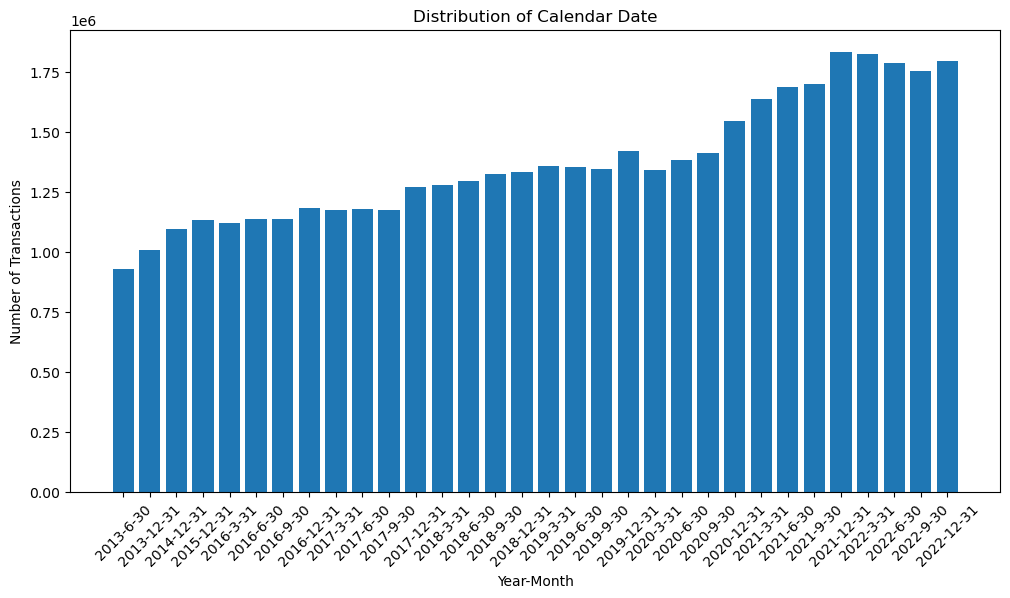

In [22]:
date_distribution = data.groupby(['year', 'month','day']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
plt.bar(date_distribution.index, date_distribution['count'])
plt.xticks(date_distribution.index, [f"{year}-{month}-{day}" for year, month,day in zip(date_distribution['year'], date_distribution['month'],date_distribution['day'])], rotation=45)
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.title('Distribution of Calendar Date')
plt.show()

<Axes: xlabel='calendardate'>

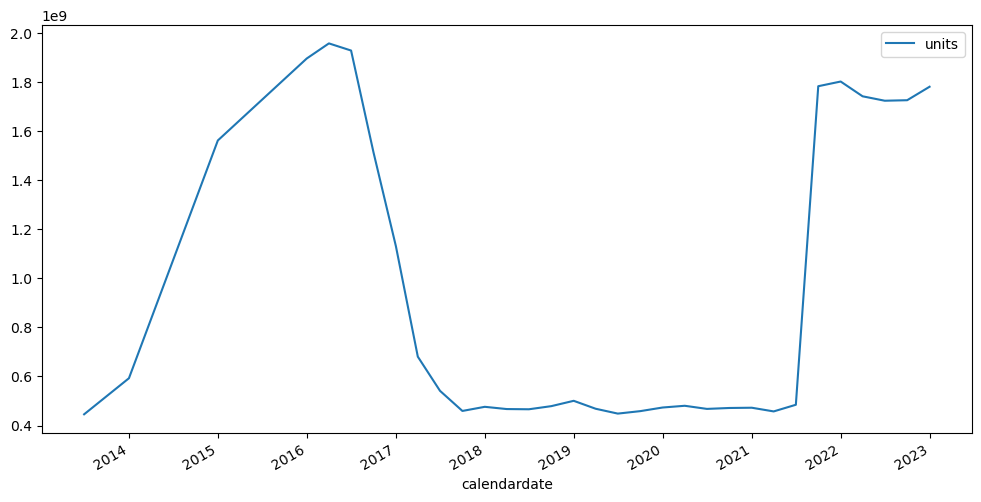

In [37]:
data_NVDA = data[data['ticker']=='NVDA']
data_NVDA.head()
data_NVDA.groupby(['calendardate']).aggregate({'units':'sum'}).plot(figsize=(12, 6))
#will want to add stock price and see if percent ownsership field is correct


In [16]:
data.groupby(['year', 'month','day']).size().reset_index(name='count')

,year,month,day,count
0,2013,6,30,928450
1,2013,12,31,1006953
2,2014,12,31,1095105
3,2015,12,31,1133021
4,2016,3,31,1117674
5,2016,6,30,1137679
6,2016,9,30,1134834
7,2016,12,31,1181571
8,2017,3,31,1173832
9,2017,6,30,1178049


ok now read in the ticker summary and see what that looks like

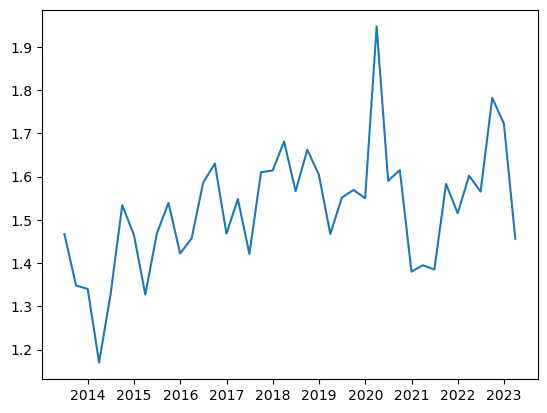

In [28]:
data_ticker_summary = pd.read_csv('data/SHARADAR_SF3A_apr5.csv')
data_ticker_summary.head()
data_ticker_summary['calendardate'] = pd.to_datetime(data_ticker_summary['calendardate'])
#select all the row where ticker = selected_ticker
selected_ticker = 'SPY'
data_aapl=data_ticker_summary[data_ticker_summary['ticker'] == selected_ticker]
data_aapl.head()
plt.plot(data_aapl['calendardate'], data_aapl['percentoftotal'])
#data_ticker_summary.select('ticker')

In [29]:
data_aapl.head()

,calendardate,ticker,name,shrholders,cllholders,putholders,wntholders,dbtholders,prfholders,fndholders,...,shrvalue,cllvalue,putvalue,wntvalue,dbtvalue,prfvalue,fndvalue,undvalue,totalvalue,percentoftotal
5,2023-03-31,SPY,SPDR S&P 500 ETF TR,0,0,0,0,0,0,8,...,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,1.339492e+08,0.0,1.339492e+08,1.456
1434,2022-12-31,SPY,SPDR S&P 500 ETF TR,0,153,332,0,0,0,3161,...,0.0,1.736617e+11,3.196650e+11,0.0,0.0,0.0,2.073751e+11,0.0,7.007018e+11,1.722
14433,2022-09-30,SPY,SPDR S&P 500 ETF TR,0,165,320,0,0,0,2957,...,0.0,1.700009e+11,2.838972e+11,0.0,0.0,0.0,1.993998e+11,0.0,6.532979e+11,1.782
27552,2022-06-30,SPY,SPDR S&P 500 ETF TR,0,178,306,0,0,0,3000,...,0.0,1.455714e+11,2.487565e+11,0.0,0.0,0.0,2.070936e+11,0.0,6.014215e+11,1.565
40763,2022-03-31,SPY,SPDR S&P 500 ETF TR,0,158,331,0,0,0,3048,...,0.0,1.211966e+11,3.619112e+11,0.0,0.0,0.0,2.570688e+11,0.0,7.401766e+11,1.602


In [26]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display
# create a multiselect dropdown menu with all the tickers
ticker_list = data_ticker_summary['ticker'].unique().astype(str).tolist()
ticker_list.sort()
ticker_dropdown = widgets.Dropdown(
    options=ticker_list,
    value='AAPL',
    description='Ticker:',
    disabled=False,
)
#display(ticker_dropdown)
#create an interactive plot that shows the percentoftotal for the selected ticker
def plot_percentoftotal(ticker):
    #data_ticker_summary['calendardate'] = pd.to_datetime(data_ticker_summary['calendardate'])
    data_ticker=data_ticker_summary[data_ticker_summary['ticker'] == ticker]
    plt.plot(data_ticker['calendardate'], data_ticker['percentoftotal'])
    plt.show()

w2=interact(plot_percentoftotal, ticker=ticker_dropdown)
display(w2)

interactive(children=(Dropdown(description='Ticker:', index=56, options=('0001388994', 'A', 'AA', 'AAA', 'AAAA…

<function __main__.plot_percentoftotal(ticker)>

In [27]:
data_investor_summary = pd.read_csv('data/SHARADAR_SF3B_apr5.csv')
data_investor_summary.head()

,calendardate,investorname,shrholdings,cllholdings,putholdings,wntholdings,dbtholdings,prfholdings,fndholdings,undholdings,...,shrvalue,cllvalue,putvalue,wntvalue,dbtvalue,prfvalue,fndvalue,undvalue,totalvalue,percentoftotal
0,2023-03-31,PARK NATIONAL CORP,210,0,0,0,0,0,60,0,...,1.911735e+09,0.0,0.0,0.0,0.0,0.0,3.334059e+08,0.0,2.245141e+09,24.403
1,2023-03-31,SYMMETRY PARTNERS LLC,488,0,0,0,0,0,50,1,...,5.215780e+08,0.0,0.0,0.0,0.0,0.0,1.287378e+09,4055000.0,1.813011e+09,19.706
2,2023-03-31,FIRST FINANCIAL BAN,136,0,0,0,1,0,57,1,...,5.384158e+08,0.0,0.0,0.0,2010593.0,0.0,3.915590e+08,1968287.0,9.339538e+08,10.151
3,2023-03-31,VERITY VERITY LLC,106,0,0,0,0,0,3,0,...,7.576357e+08,0.0,0.0,0.0,0.0,0.0,1.001409e+07,0.0,7.676498e+08,8.344
4,2023-03-31,KEEL POINT LLC,167,0,0,0,0,0,135,0,...,2.071627e+08,0.0,0.0,0.0,0.0,0.0,4.850009e+08,0.0,6.921636e+08,7.523
